### <b> Dominik Szot <br> Laboratorium 06 <br> Kwadratury </b>

<b> Zadanie 1 </b>
$$ 
    \int_0^{1} \frac {4} {1+x^2} dx = \pi 
$$

Powyższą równość można wykorzystać do obliczenia przybliżonej wartości $ \pi $ poprzez całkowanie numeryczne.

*  Oblicz wartość powyższej całki, korzystając ze złożonych kwadratur prostokątów, trapezów i Simpsona. Można wykorzystać `funkcje integrate.trapz` i `integrate.simps` z biblioteki scipy.
Na przedziale całkowania rozmieść $2^m + 1$ równoodległych węzłów. W kolejnych próbach $ m $ wzrasta o $ 1 $ , tzn.
między każde dwa sąsiednie węzły dodawany jest nowy węzeł, a ich zagęszczenie zwiększa się dwukrotnie. Przyjmij zakres wartości $ m $ od $ 1 $ do $ 25$ .
Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od $ m $. Wyniki przedstaw na wspólnym wykresie, używając skali logarytmicznej na osi $y$.

* Czy istnieje pewna wartość, poniżej której zmniejszanie kroku $ h $ nie zmniejsza już błędu kwadratury? Porównaj wartość $h_{min}$, odpowiadającą minimum wartości bezwzględnej błędu względnego, z wartością wyznaczoną w
laboratorium 1.

* Dla każdej z użytych metod porównaj empiryczny rząd zbieżności z rzędem zbieżności przewidywanym przez teorię. Aby wyniki miały sens, do obliczenia rzędu empirycznego użyj wartości $ h$  z zakresu, w którym błąd metody przeważa nad błędem numerycznym.


Import potrzebnych bibliotek

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker

Funkcja dzięki której będziemy obliczać przybliżona wartość PI

In [6]:
f_x = lambda x : 4./(1 + x**2)

Wzór prostokątów 

Idea: 
$$ 
    y_i = \frac {1} {2} (x_i + x_{i+1})
$$

$$ 
    \int_{x_i}^{x_{i+1}} f(x) dx \approx f(y_i)h_i
$$

* Stopień dokładności: 1
* kwadratura otwarta

Funkcja do obliczania kwadratur prostokątów

In [7]:
def rectangular_method(nodes, values) -> None:
    accumulated = 0.

    for i in range(1, len(nodes)):
        accumulated += (nodes[i] - nodes[i-1])*values[i]
    
    return accumulated

<b>Wzór trapezów: </b>
$$
    \int_{x_i}^{x_{x+1}} f(x)dx \approx \frac {1} {2} [f(x_i) + f(x_{i+1})] * h_i
$$

* stopień dokładności: 1
* kwadratura zamknięta

<b>Wzór Simpsona: <br> </b>
Całkujemy parabolę przechodzącą przez punkty $ x_i $, $ \frac {x_i + x_{i+1}} {2} $ , $x_{i+1}$

$$
    \int_{x_i}^{x_{x+1}} f(x)dx \approx \frac {1} {6} * h_i[f(x_i) + 4f(\frac {x_i + x_{i+1}} {2}) + x_{i+1}]
$$


Funkcja obliczająca wartość całki

In [8]:
m = 26

a = 0
b = 1

# Tablica wartości błędów względnych
error_trapz = [np.double(0) for _ in range(m-1)]
error_simps = [np.double(0) for _ in range(m-1)]
error_rectangle = [np.double(0) for _ in range(m-1)]

for i in range(1, m):
    no_nodes = 2**i + 1
    
    # Rozmieszczanie 2**i + 1 równoodległych węzłów
    quadrature_nodes = np.array([np.double(a) + np.double(i) * np.double((b-a))/(no_nodes-1) for i in range(no_nodes)])
    quadrature_points = [f_x(i) for i in quadrature_nodes]

    # Rozwiazywanie całki
    result_trapz = integrate.trapezoid(quadrature_points, quadrature_nodes, 1)
    result_simps = integrate.simpson(quadrature_points, quadrature_nodes, 1)
    result_rectangle = rectangular_method(quadrature_nodes, quadrature_points);

    error_trapz[i-1]=(np.abs((np.pi - result_trapz)/np.pi))
    error_simps[i-1]=(np.abs((np.pi - result_simps)/np.pi))
    error_rectangle[i-1]=(np.abs((np.pi - result_rectangle)/np.pi))

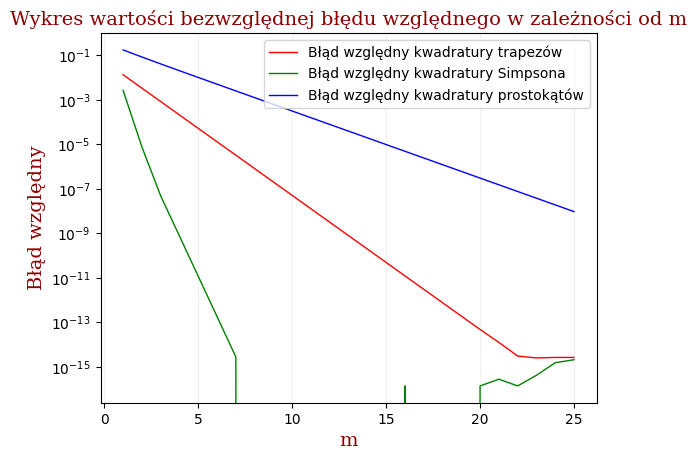

In [9]:
x_no_points = [i for i in range(1, m)]

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
}

plt.semilogy(x_no_points, error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury trapezów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_simps, linewidth=1,  color="green", label="Błąd względny kwadratury Simpsona")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_rectangle, linewidth=1,  color="blue", label="Błąd względny kwadratury prostokątów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')


plt.title("Wykres wartości bezwzględnej błędu względnego w zależności od m", fontdict=font)
plt.xlabel("m", fontdict=font)
plt.ylabel("Błąd względny", fontdict=font)
plt.legend()
plt.show()

In [10]:
h_min_t = 0
h_min_r = 0
h_min_s = 0

for i in range(1, len(error_trapz)):
    if error_trapz[i] < error_trapz[i-1] and error_trapz[i-1] > 0:
        h_min_t = error_trapz[i-1]
    else:
        break

for i in range(1, len(error_trapz)):
    if error_trapz[i] < error_rectangle[i-1] and error_rectangle[i-1] > 0:
        h_min_r = error_rectangle[i-1]
    else:
        break

for i in range(1, len(error_trapz)):
    if error_simps[i] < error_simps[i-1] and error_simps[i-1] > 0:
        h_min_s = error_simps[i-1]
    else:
        break

d = pd.Series([h_min_t, h_min_r, h_min_s], index=["K. Trapezów","K. Prostokątów", "K. Simpsona"])
print(d)


K. Trapezów       3.109876e-15
K. Prostokątów    1.897257e-08
K. Simpsona       2.827160e-15
dtype: float64


Przy obliczaniu całki korzystając z kwadratur prostokątów i Simpsona <br> 
jesteśmy w stanie wyznaczyć wartość $h_{min}$ wynoszącą odpowiednio 

|Kwadratura| $h_{min}$|
| :-: | :-: |
| Trapezów |  3.109876e-15 |
| Prostokątów |  1.897257e-08  |
| Simpsona |  2.827160e-15 |

Należy wspomnieć że w programie korzystam z typu np.double posiadającego podwójna precyzję.

In [11]:
def machineEpsilon(func=float):
    machine_epsilon = func(1)
    while func(1)+func(machine_epsilon) != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last

print("Eps. maszynowy dla np.double: ", machineEpsilon(np.double))

Eps. maszynowy dla np.double:  2.220446049250313e-16


Wartości Epsilona Maszynowego wyliczone używając funkcji z laboratorium 01 <br> 
są zbliżone do wartości $h_{min}$ dla kwadratur Simpsona i Trapezów.<br>

Oznacza to że dla tych kwadratur zbliżyliśmy się do maksymalnej precycji obliczeń całki 
dla typu double z podwójną precycją (float64). 

Dla kwadratur prostokątów błąd metody przeważa nad <br> 
błędem numerycznym dla 1 <= m <= 25 , więc nie jesteśmy w stanie porównać <br>
wartości $h_{min}$ oraz Epilona Maszynowego. 

<b> Zadanie 2. </b>
Oblicz wartość całki

$$
    \int_0^{1} \frac {4} {1+x^2} dx
$$

metodą Gaussa-Legendre’a. Narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, $ n + 1$ . Przyjmij na tyle duży zakres $ n $, aby wykryć, kiedy błąd numeryczny zaczyna przeważać nad błędem metody. Postaraj się umiejscowić otrzymane wyniki na wykresie stworzonym w podpunkcie (a).


In [12]:
f_x_2 = lambda x : np.double(4)/(1 + x**2)

Aby obliczyć wartość całki metodą Gaussa-Legendre'a skorzystałem z funkcji leggauss z biblioteki numpy.<br>

In [13]:
def gauss_l(f_x_2, a, b, n):
    l, c = np.polynomial.legendre.leggauss(n)
    
    l = (b-a)/2 * l + (b+a)/2
    c = (b-a)/2 * c

    return np.double(np.sum(c * f_x_2(l), dtype=np.float64))

Obliczam wartości całki oraz wartość bezwzględna błedu względnego.

In [14]:
f_2_values = np.array([gauss_l(f_x_2, np.double(0), np.double(1), i) for i in range(1,m+2)], dtype=np.float64)
gauss_l_errors = [np.abs((np.pi - f_2_values[i])/np.pi) for i in range(1, m+1)]

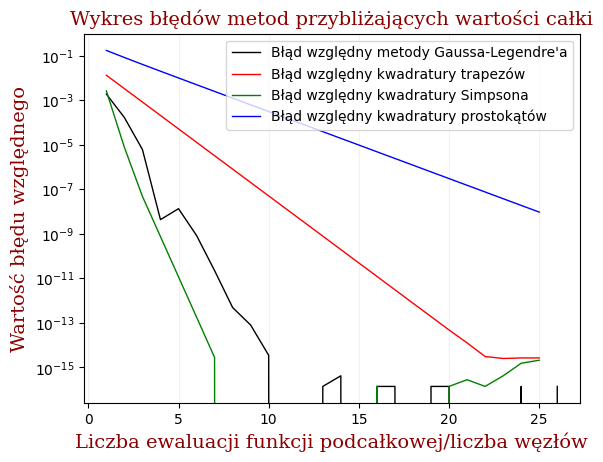

In [15]:
plt.semilogy([i for i in range(1, m+1)], gauss_l_errors, linewidth=1,  color="black", label="Błąd względny metody Gaussa-Legendre'a")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')

plt.title("Wykres błędów metod przybliżających wartości całki", fontdict=font)
plt.xlabel("Liczba ewaluacji funkcji podcałkowej/liczba węzłów", fontdict=font)
plt.ylabel("Wartość błędu względnego", fontdict=font)

plt.semilogy(x_no_points, error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury trapezów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_simps, linewidth=1,  color="green", label="Błąd względny kwadratury Simpsona")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

plt.semilogy(x_no_points, error_rectangle, linewidth=1,  color="blue", label="Błąd względny kwadratury prostokątów")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')

plt.legend()
plt.show()


Wartości błędu względnego maleją prawie zawsze dla 0 < n < 10. Dla n > 10 
<br> błąd numeryczny zaczyna dominować nad błędem metody.

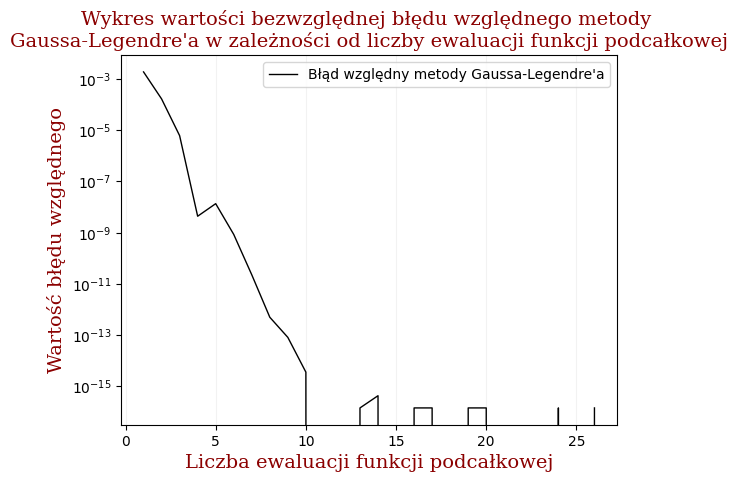

In [16]:
plt.semilogy([i for i in range(1, m+1)], gauss_l_errors, linewidth=1,  color="black", label="Błąd względny metody Gaussa-Legendre'a")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.grid(axis='x', color='0.95')
plt.title("Wykres wartości bezwzględnej błędu względnego metody \nGaussa-Legendre'a w zależności od liczby ewaluacji funkcji podcałkowej", fontdict=font)
plt.xlabel("Liczba ewaluacji funkcji podcałkowej", fontdict=font)
plt.ylabel("Wartość błędu względnego", fontdict=font)

plt.legend()
plt.show()
